# Exploratory Data Analysis - GDP Expenditure Approach

<hr>

### Economists examine the economy each year and estimate our total production by calculating GDP. We have two widely accepted ways to measure the total production in our economy. One is called the income approach, and the other is called the expenditure approach. This analysis will look at GDP using the expenditure approach to depict a time series trend of GDP, as well as which factors are closely correlated with GDP.

<hr>


### The expenditure approach to calculating gross domestic product (GDP) takes into account the sum of all final goods and services purchased in an economy over a set period of time. That includes all consumer spending, government spending, business investment spending, and net exports. <br> <br> Using the API from Federal Reserve of Economic Data (FRED), we can obtain individual series of each variable of GDP listed below:

<hr>

##### <blockquote> GDP = Consumption + Investment + Government Spending + (Exports - Imports)

<hr>

In [596]:
!pip install fredapi >null

In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

plt.style.use('fivethirtyeight')
Color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '14145ca660ce4d9ba0c31423d4108a14'

In [626]:
fred = Fred(api_key=fred_key)

## Real Gross Domestic Product

In [627]:
RGDP = fred.search('Real Gross Domestic Product', order_by = 'popularity', filter=('frequency','Quarterly'))

In [628]:
RGDP.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
GDPC1,GDPC1,2023-02-19,2023-02-19,Real Gross Domestic Product,1947-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:02-06:00,92,BEA Account Code: A191RX Real gross domestic ...
A939RX0Q048SBEA,A939RX0Q048SBEA,2023-02-19,2023-02-19,Real gross domestic product per capita,1947-01-01,2022-10-01,Quarterly,Q,Chained 2012 Dollars,Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:56:03-06:00,78,BEA Account Code: A939RX For more information...
A191RL1Q225SBEA,A191RL1Q225SBEA,2023-02-19,2023-02-19,Real Gross Domestic Product,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:02-06:00,76,BEA Account Code: A191RL Gross domestic produ...
GDPPOT,GDPPOT,2023-02-19,2023-02-19,Real Potential Gross Domestic Product,1949-01-01,2032-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Not Seasonally Adjusted,NSA,2022-05-26 13:45:01-05:00,71,Real potential GDP is the CBO’s estimate of th...
PCECC96,PCECC96,2023-02-19,2023-02-19,Real Personal Consumption Expenditures,1947-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:56:04-06:00,64,BEA Account Code: DPCERX A Guide to the Natio...


In [629]:
Real_GDP = fred.get_series(series_id='GDPC1')
Real_GDP.head()

1947-01-01    2034.450
1947-04-01    2029.024
1947-07-01    2024.834
1947-10-01    2056.508
1948-01-01    2087.442
dtype: float64

## Real Personal Consumption Expenditures

In [630]:
RPCE = fred.search('Real Personal Consumption Expenditures', order_by = 'popularity', filter=('frequency','Quarterly'))

In [631]:
RPCE.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
A191RL1Q225SBEA,A191RL1Q225SBEA,2023-02-19,2023-02-19,Real Gross Domestic Product,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:02-06:00,76,BEA Account Code: A191RL Gross domestic produ...
PCECC96,PCECC96,2023-02-19,2023-02-19,Real Personal Consumption Expenditures,1947-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:56:04-06:00,64,BEA Account Code: DPCERX A Guide to the Natio...
DPCERY2Q224SBEA,DPCERY2Q224SBEA,2023-02-19,2023-02-19,Contributions to percent change in real gross ...,1947-04-01,2022-10-01,Quarterly,Q,Percentage Points at Annual Rate,Percentage Points at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:55:07-06:00,54,BEA Account Code: DPCERY For more information...
A794RX0Q048SBEA,A794RX0Q048SBEA,2023-02-19,2023-02-19,Real personal consumption expenditures per capita,1947-01-01,2022-10-01,Quarterly,Q,Chained 2012 Dollars,Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:56:06-06:00,49,BEA Account Code: A794RX For more information...
DPCERL1Q225SBEA,DPCERL1Q225SBEA,2023-02-19,2023-02-19,Real Personal Consumption Expenditures,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:55:06-06:00,47,BEA Account Code: DPCERL For more information...


In [632]:
Real_PCE = fred.get_series(series_id='PCECC96')
Real_PCE.head()

1947-01-01    1277.440
1947-04-01    1298.692
1947-07-01    1302.925
1947-10-01    1303.340
1948-01-01    1309.834
dtype: float64

## Real Gross Private Domestic Investment

In [633]:
RGPDI = fred.search('Real Gross Private Domestic Investment', order_by = 'popularity', filter=('frequency','Quarterly'))

In [634]:
RGPDI.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
A191RL1Q225SBEA,A191RL1Q225SBEA,2023-02-19,2023-02-19,Real Gross Domestic Product,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:02-06:00,76,BEA Account Code: A191RL Gross domestic produ...
GPDIC1,GPDIC1,2023-02-19,2023-02-19,Real Gross Private Domestic Investment,1947-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:11-06:00,63,BEA Account Code: A006RX A Guide to the Natio...
PRFIC1,PRFIC1,2023-02-19,2023-02-19,Real Private Residential Fixed Investment,2002-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:14-06:00,48,BEA Account Code: A011RX A Guide to the Natio...
PNFIC1,PNFIC1,2023-02-19,2023-02-19,Real Private Nonresidential Fixed Investment,2002-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:14-06:00,47,BEA Account Code: A008RX A Guide to the Natio...
A014RY2Q224SBEA,A014RY2Q224SBEA,2023-02-19,2023-02-19,Contributions to percent change in real gross ...,1947-04-01,2022-10-01,Quarterly,Q,Percentage Points at Annual Rate,Percentage Points at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:17-06:00,39,BEA Account Code: A014RY For more information...


In [635]:
Real_GPDI = fred.get_series(series_id='GPDIC1')
Real_GPDI.head()

1947-01-01    218.091
1947-04-01    201.386
1947-07-01    195.461
1947-10-01    233.284
1948-01-01    257.220
dtype: float64

## Real Government Consumption Expenditures and Gross Investment

In [636]:
RGCE = fred.search('Real Government Consumption Expenditures and Gross Investment', order_by = 'popularity', filter=('frequency','Quarterly'))

In [637]:
RGCE.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
A191RL1Q225SBEA,A191RL1Q225SBEA,2023-02-19,2023-02-19,Real Gross Domestic Product,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:02-06:00,76,BEA Account Code: A191RL Gross domestic produ...
GCEC1,GCEC1,2023-02-19,2023-02-19,Real Government Consumption Expenditures and G...,1947-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:56:05-06:00,56,BEA Account Code: A822RX A Guide to the Natio...
A822RY2Q224SBEA,A822RY2Q224SBEA,2023-02-19,2023-02-19,Contributions to percent change in real gross ...,1947-04-01,2022-10-01,Quarterly,Q,Percentage Points at Annual Rate,Percentage Points at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:56:12-06:00,37,BEA Account Code: A822RY For more information...
PB0000031Q225SBEA,PB0000031Q225SBEA,2023-02-19,2023-02-19,Real final sales to private domestic purchasers,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:55:10-06:00,23,BEA Account Code: PB000003 Final sales to dom...
A824RL1Q225SBEA,A824RL1Q225SBEA,2023-02-19,2023-02-19,Real Government Consumption Expenditures and G...,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:56:14-06:00,21,BEA Account Code: A824RL For more information...


In [638]:
Real_GCE = fred.get_series(series_id='GCEC1')
Real_GCE.head()

1947-01-01    524.026
1947-04-01    523.583
1947-07-01    523.477
1947-10-01    519.236
1948-01-01    526.970
dtype: float64

## Real Imports of goods and services

In [639]:
IMPGS = fred.search('Real imports of goods and services', order_by = 'popularity', filter=('frequency','Quarterly'))

In [640]:
IMPGS.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
IMPGSC1,IMPGSC1,2023-02-19,2023-02-19,Real imports of goods and services,1947-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:15-06:00,46,BEA Account Code: A021RX A Guide to the Natio...
ND000342Q,ND000342Q,2023-02-19,2023-02-19,Real Imports of Goods and Services,2002-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Not Seasonally Adjusted,NSA,2023-01-26 07:55:13-06:00,16,BEA Account Code: ND000342
JPNRGDPIGS,JPNRGDPIGS,2023-02-19,2023-02-19,Real Imports of Goods and Services for Japan,1994-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2015 Yen,Bil. of Chn. 2015 Yen,Seasonally Adjusted,SA,2023-02-15 09:28:04-06:00,8,"Copyright, 2016, Cabinet Office of Japan."
A021RL1Q158SBEA,A021RL1Q158SBEA,2023-02-19,2023-02-19,Real Imports of Goods and Services,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:35-06:00,7,BEA Account Code: A021RL For more information...
NMRSAXDCCAQ,NMRSAXDCCAQ,2023-02-19,2023-02-19,Real Imports of Goods and Services for Canada,1961-01-01,2022-04-01,Quarterly,Q,Domestic Currency,Domestic Currency,Seasonally Adjusted,SA,2022-09-19 07:09:46-05:00,5,None


In [641]:
Real_IMPGS = fred.get_series(series_id='IMPGSC1')
Real_IMPGS.head()

1947-01-01    60.396
1947-04-01    61.559
1947-07-01    54.594
1947-10-01    57.538
1948-01-01    64.883
dtype: float64

## Real Exports of Goods and Services

In [642]:
EXPGS = fred.search('Real exports of goods and services', order_by = 'popularity', filter=('frequency','Quarterly'))

In [643]:
EXPGS.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
A191RL1Q225SBEA,A191RL1Q225SBEA,2023-02-19,2023-02-19,Real Gross Domestic Product,1947-04-01,2022-10-01,Quarterly,Q,Percent Change from Preceding Period,% Chg. from Preceding Period,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:02-06:00,76,BEA Account Code: A191RL Gross domestic produ...
NETEXC,NETEXC,2023-02-19,2023-02-19,Real Net Exports of Goods and Services,1970-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:15-06:00,47,BEA Account Code: A019RX
EXPGSC1,EXPGSC1,2023-02-19,2023-02-19,Real Exports of Goods and Services,1947-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2012 Dollars,Bil. of Chn. 2012 $,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:15-06:00,44,BEA Account Code: A020RX A Guide to the Natio...
A019RY2Q224SBEA,A019RY2Q224SBEA,2023-02-19,2023-02-19,Contributions to percent change in real gross ...,1947-04-01,2022-10-01,Quarterly,Q,Percentage Points at Annual Rate,Percentage Points at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2023-01-26 07:57:21-06:00,41,BEA Account Code: A019RY For more information...
JPNRGDPNGS,JPNRGDPNGS,2023-02-19,2023-02-19,Real Net Exports of Good and Services for Japan,1994-01-01,2022-10-01,Quarterly,Q,Billions of Chained 2015 Yen,Bil. of Chn. 2015 Yen,Seasonally Adjusted,SA,2023-02-15 09:28:02-06:00,27,"Copyright, 2016, Cabinet Office of Japan."


In [644]:
Real_EXPGS = fred.get_series(series_id='EXPGSC1')
Real_EXPGS.head()

1947-01-01    97.630
1947-04-01    96.399
1947-07-01    91.506
1947-10-01    81.139
1948-01-01    77.437
dtype: float64

## Combine Data

#### Now that we have all the series contained in variables, we can compile the dataset.

In [645]:
All_Fred = pd.DataFrame(columns = ['Real Gross Domestic Product', 'Real Personal Consumption Expenditures', 
                                   'Real Gross Private Domestic Investment', 'Real Gross Consumption Expenditures',
                                   'Imports of Goods and Services',
                                   'Exports of Goods and Services'])
All_Fred['Real Gross Domestic Product'] = Real_GDP
All_Fred['Real Personal Consumption Expenditures'] = Real_PCE
All_Fred['Real Gross Private Domestic Investment'] = Real_GPDI
All_Fred['Real Gross Consumption Expenditures'] = Real_GCE
All_Fred['Imports of Goods and Services'] = Real_IMPGS
All_Fred['Exports of Goods and Services'] = Real_EXPGS
All_Fred

,Real Gross Domestic Product,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Gross Consumption Expenditures,Imports of Goods and Services,Exports of Goods and Services
1947-01-01,2034.450,1277.440,218.091,524.026,60.396,97.630
1947-04-01,2029.024,1298.692,201.386,523.583,61.559,96.399
1947-07-01,2024.834,1302.925,195.461,523.477,54.594,91.506
1947-10-01,2056.508,1303.340,233.284,519.236,57.538,81.139
1948-01-01,2087.442,1309.834,257.220,526.970,64.883,77.437
...,...,...,...,...,...,...
2021-10-01,20006.181,13981.514,3841.771,3412.858,3763.316,2465.672
2022-01-01,19924.088,14028.383,3892.480,3393.389,3925.633,2436.934
2022-04-01,19895.271,14099.456,3746.973,3379.499,3947.472,2516.928
2022-07-01,20054.663,14178.562,3653.850,3410.625,3872.908,2604.137


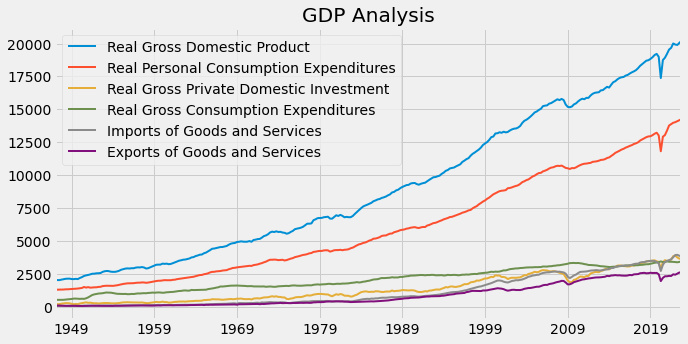

In [646]:
All_Fred.plot(figsize=(10, 5), title='GDP Analysis', lw=2)
plt.show()

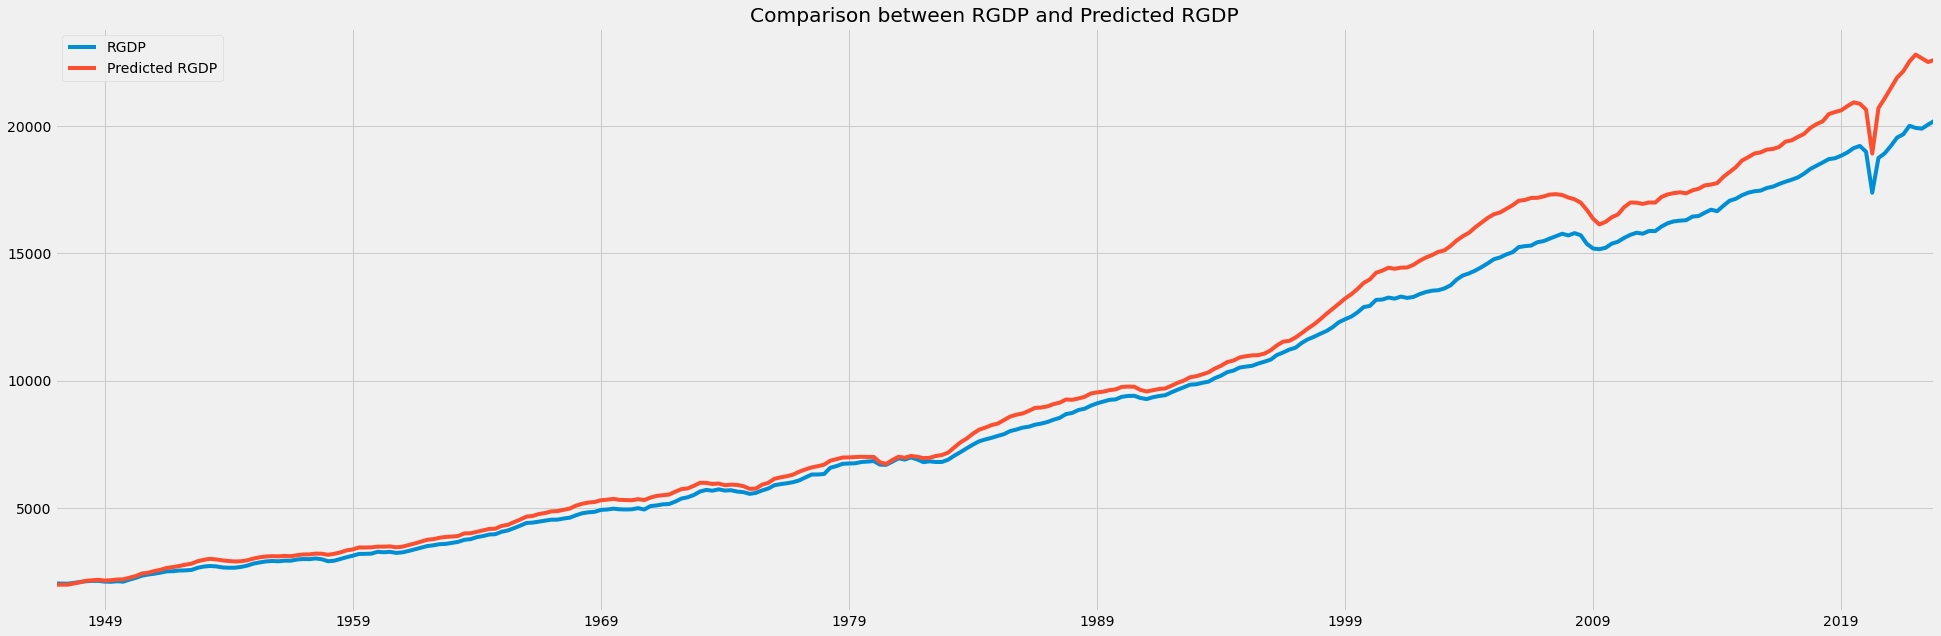

In [647]:
All_Fred2 = All_Fred.copy()
All_Fred2['Net Exports'] = (All_Fred2['Imports of Goods and Services'] - All_Fred2['Exports of Goods and Services'])
All_Fred2['Expenditure Approach'] = All_Fred2['Real Personal Consumption Expenditures'] + All_Fred2['Real Gross Private Domestic Investment'] + All_Fred2['Real Gross Consumption Expenditures'] + All_Fred2['Net Exports']
RGDP1 = All_Fred2['Real Gross Domestic Product']
PRGDP1 = All_Fred2['Expenditure Approach']
fig, ax = plt.subplots(figsize=(30, 10))
RGDP1.plot(ax=ax, label='RGDP')
PRGDP1.plot(ax=ax, label='Predicted RGDP')
ax.legend(['RGDP', 'Predicted RGDP'])
plt.title('Comparison between RGDP and Predicted RGDP')
plt.show()

#### A large portion of the U.S. GDP is reliant on Personal Consumption. There is also a large drop near 2020 that we can infer was due to the COVID-19 Pandemic. Combining the factors of the expenditure approach, we can see that our Real GDP and Predicted GDP are almost identical, with external factors impacting GDP around the year 2000.

## Convert Data to Percent Change

In [648]:
All_Fred = All_Fred.pct_change(periods = 4).dropna()
All_Fred.head()

,Real Gross Domestic Product,Real Personal Consumption Expenditures,Real Gross Private Domestic Investment,Real Gross Consumption Expenditures,Imports of Goods and Services,Exports of Goods and Services
1948-01-01,0.026047,0.025359,0.179416,0.005618,0.074293,-0.206832
1948-04-01,0.045773,0.020315,0.356291,0.041969,0.095778,-0.271797
1948-07-01,0.053941,0.018501,0.411719,0.063924,0.300088,-0.214827
1948-10-01,0.038868,0.026303,0.126271,0.112121,0.213563,-0.145713
1949-01-01,0.009370,0.022868,-0.131067,0.124863,0.043894,0.002260


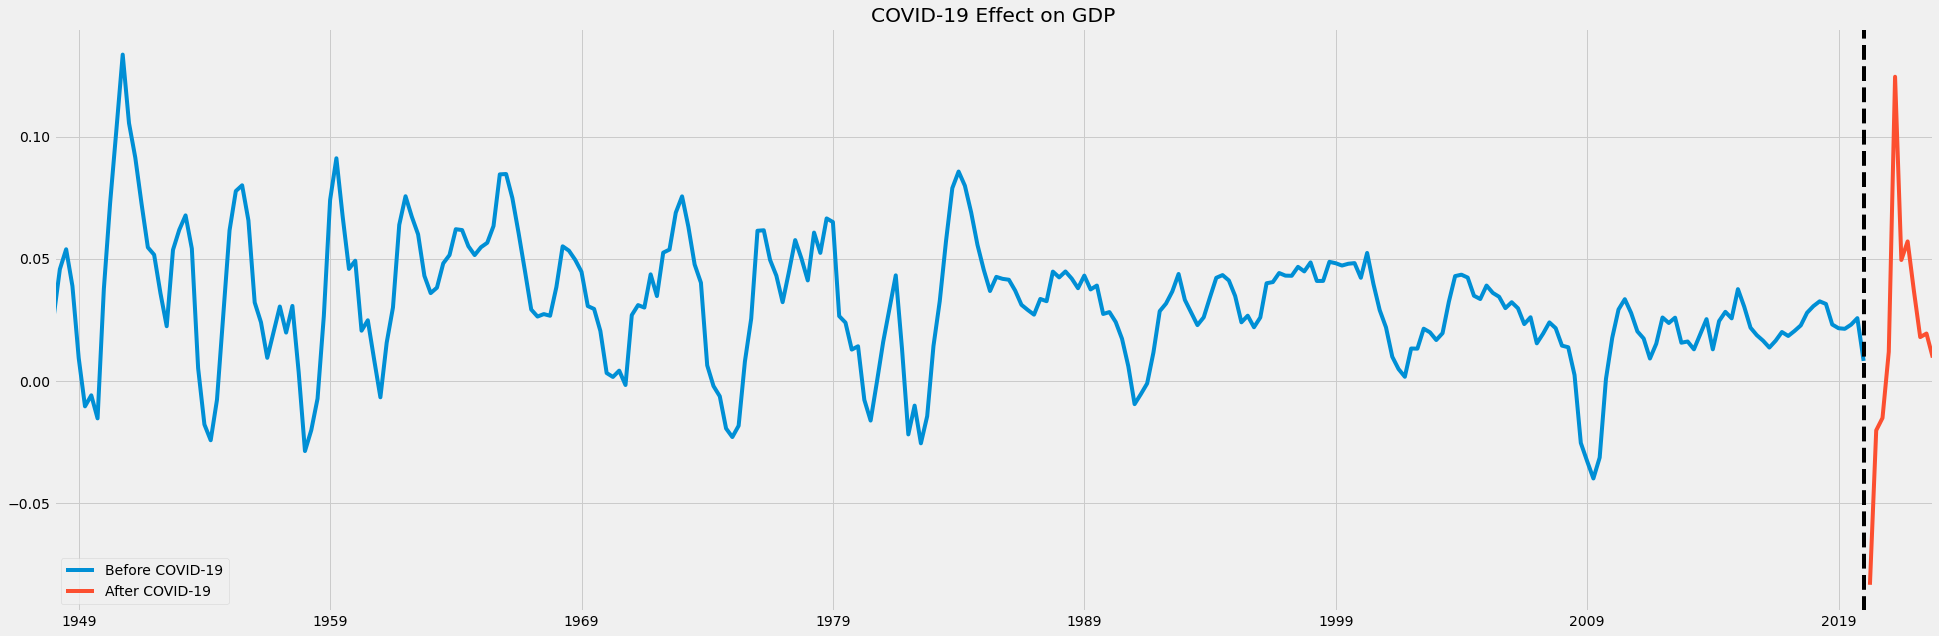

In [649]:
Before_Covid = All_Fred['Real Gross Domestic Product'].loc[All_Fred.index < '2020-03-01']
After_Covid = All_Fred['Real Gross Domestic Product'].loc[All_Fred.index >= '2020-03-01']

fig, ax = plt.subplots(figsize=(30, 10))
Before_Covid.plot(ax=ax, label='Training Set')
After_Covid.plot(ax=ax, label='Test Set')
ax.axvline('2020-03-01', color='black', ls='--')
ax.legend(['Before COVID-19', 'After COVID-19'])
plt.title('COVID-19 Effect on GDP')
plt.show()

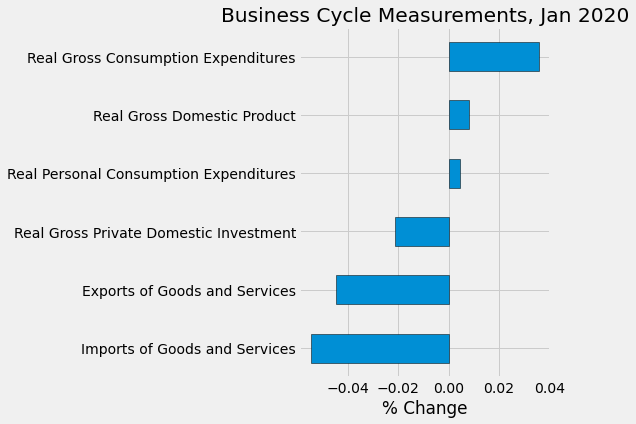

In [650]:
ax = All_Fred.loc[All_Fred.index == '2020-01-01'].T \
    .sort_values('2020-01-01') \
    .plot(kind='barh', figsize=(4, 6), width=0.5, edgecolor='black',
          title='Business Cycle Measurements, Jan 2020')
ax.legend().remove()
ax.set_xlabel('% Change')
plt.show()

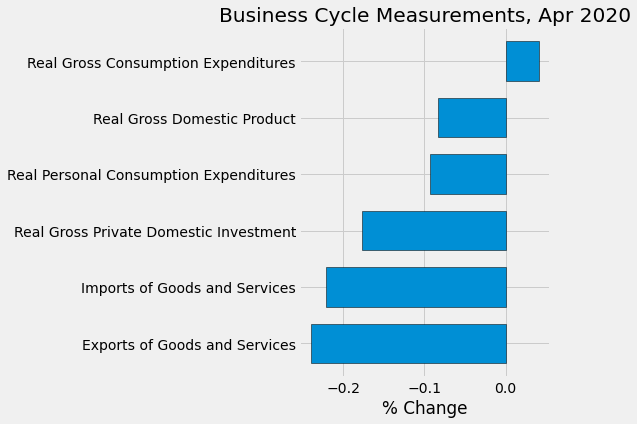

In [651]:
ax2 = All_Fred.loc[All_Fred.index == '2020-04-01'].T \
    .sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(4, 6), width=0.7, edgecolor='black',
          title='Business Cycle Measurements, Apr 2020')
ax2.legend().remove()
ax2.set_xlabel('% Change')
plt.show()

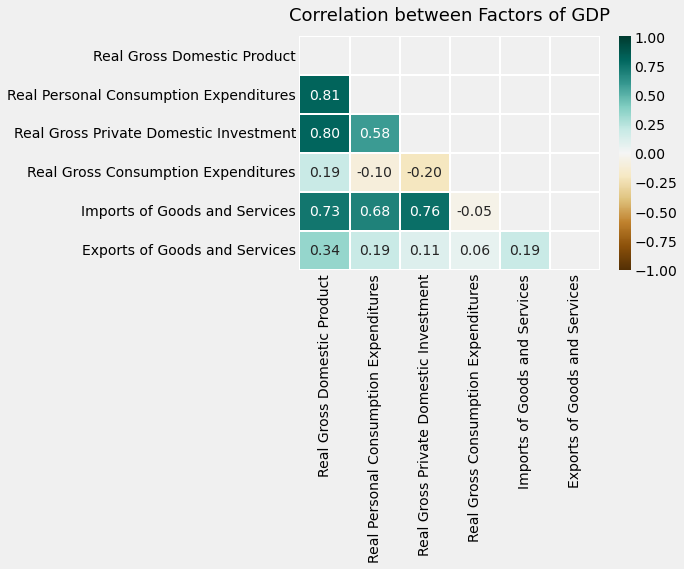

In [652]:
mask = np.triu(np.ones_like(All_Fred.corr(), dtype=bool))
heatmap = sns.heatmap(All_Fred.corr(method='pearson'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt='.2f', linewidths = 2)
heatmap.set_title('Correlation between Factors of GDP', fontdict={'fontsize':18}, pad=16)
heatmap;